<a href="https://colab.research.google.com/github/sRajeswari/AIPND-Exercises/blob/master/41_Rajeswari_beginner_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 4.1 - Movies

# Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.

# Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.

# Note: If you want to run R code, you must start the cell with `%%R`.



# BEGINNER R

# Identification Information

You can find your MITxPro username on this [page](https://courses.xpro.mit.edu/courses/course-v1:xPRO+DSx+R14/progress) and copying the username in quotations after it says "Student". For example, Kevin's username is "kevin-lyons".

**Please use the correct username and the e-mail address right next to it as it makes it much easier for course staff to identify your notebook.**

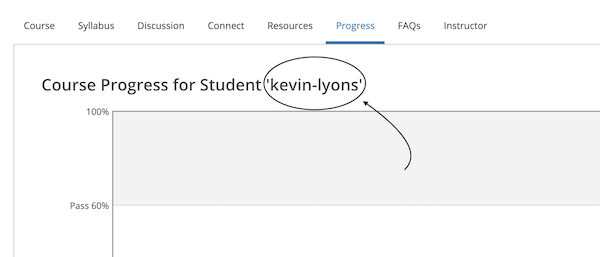

**YOUR NAME**              = Rajeswari Subramanian

**YOUR MITX PRO USERNAME** = rajeswari-subramanian

**YOUR MITX PRO E-MAIL**   = agni1984@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

If you see red messages, don't worry! See [**this FAQ**](https://courses.xpro.mit.edu/asset-v1:xPRO+DSx+R14+type@asset+block@4.1_instruction_manual_14.html#red).

In [138]:
from google.colab import auth
auth.authenticate_user()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
data = drive.CreateFile({'id':'1VUbaQTeCtxEoCAL6F9Sl9Ev5kiPc0aiU'})
data.GetContentFile('u.data.txt')

In [139]:
# This cell allows us to run R code in a Python notebook

# Comment out the next "%%capture" line to show the output from the installation
# It is a bunch of jibberish, so we disable it by default
# You can comment out a line by putting a "#" at the front
%%capture

%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [140]:
# Comment out the next "%%capture" line to show the output from the installation
# It is a bunch of jibberish, so we disable it by default
# You can comment out a line by putting a "#" at the front
%%capture
%%R

install.packages('recommenderlab')

In [141]:
%%R
install.packages('pROC')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pROC_1.16.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 371822 bytes (363 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [142]:
%%R
install.packages('gridExtra')


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

# Import

Import the required tools into the notebook.

In [143]:
%%R
library('recommenderlab')
library(gridExtra)
print('Import successful!')

[1] "Import successful!"


# Data

Load the MovieLens data.

In [144]:
%%R
data = read.table('u.data.txt')
colnames(data) = c("user_id", "item_id", "rating", "timestamp")
data = data[ , -which(names(data) %in% c("timestamp"))]
print('Data loading successful!')

[1] "Data loading successful!"


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.

In [145]:
%%R
print(nrow(data))

[1] 100000


[1] "Histogram generation successful!"


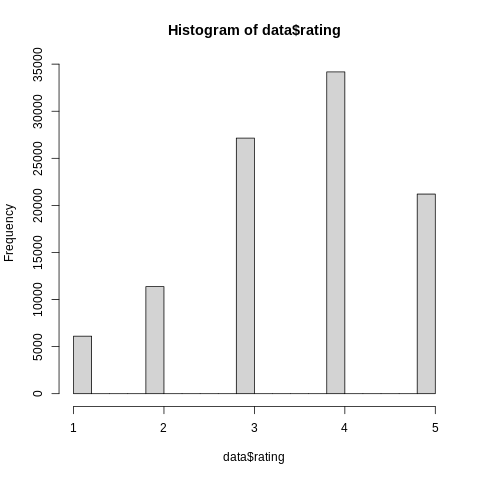

In [146]:
%%R
hist(data$rating)
print('Histogram generation successful!')

We must now subset the data into train and test sets to use for our different models. Here, we split the entire dataset into 70% train and 30% test.

In [147]:
%%R

# First, we convert our data type to a recommenderlab compatible type
data_new = as(data, "realRatingMatrix")

# Now, we apply a split of 0.7 train, 0.3 test
# You can ignore the given parameter
data_split = evaluationScheme(data_new, method="split", train=0.7, goodRating=3, given=-1)
train = getData(data_split, "train")
test_X = getData(data_split, "known")
test_Y = getData(data_split, "unknown")

print('Data subset successful!')

[1] "Data subset successful!"


In [212]:
%%R
dim(train)

[1]  660 1682


<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

In [148]:
%%R
library(ggplot2)

In [149]:
%%R
data_new

943 x 1682 rating matrix of class ‘realRatingMatrix’ with 100000 ratings.


In [150]:
%%R
nratings(data_new)

[1] 100000


In [151]:
%%R
class(data_new)

[1] "realRatingMatrix"
attr(,"package")
[1] "recommenderlab"


In [152]:
%%R
methods(class=class(data_new))

 [1] [                      [<-                    binarize              
 [4] calcPredictionAccuracy coerce                 colCounts             
 [7] colMeans               colSds                 colSums               
[10] denormalize            dim                    dimnames              
[13] dimnames<-             dissimilarity          evaluationScheme      
[16] getData.frame          getList                getNormalize          
[19] getRatingMatrix        getRatings             getTopNLists          
[22] hasRating              image                  normalize             
[25] nratings               Recommender            removeKnownRatings    
[28] rowCounts              rowMeans               rowSds                
[31] rowSums                sample                 show                  
[34] similarity            
see '?methods' for accessing help and source code


In [153]:
%%R
vector_ratings=as.vector(data_new@data)
unique(vector_ratings)

[1] 5 4 0 3 1 2


In [154]:
%%R
table_ratings=table(vector_ratings)
table_ratings

vector_ratings
      0       1       2       3       4       5 
1486126    6110   11370   27145   34174   21201 


<p><font color= blue>
1) Dataset having 943 users and 1682 movies which leades 943*1682 ratings (1586126 ratings as total)
</font>
</p>
<p><font color= blue>
2) Movies are rated in scale of 1 to 5
</font>
</p>
<p><font color= blue>
3) Many movies are rated around 3 to 4 , by many users
</font>
</p>

In [213]:
%%R
table_views_movie=data.frame(movie=names(views_per_movie),views=colCounts(train))
table_views_movie_filtered=table_views_movie[table_views_movie$views<20,]
dim(table_views_movie_filtered)

[1] 843   2


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



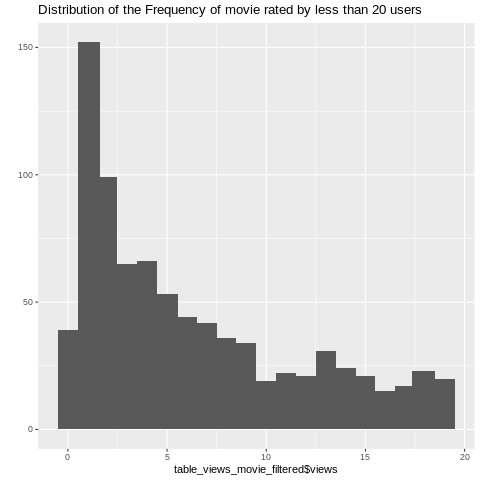

In [214]:
%%R
qplot(table_views_movie_filtered$views) + stat_bin(binwidth=1) + ggtitle("Distribution of the Frequency of movie rated by less than 20 users")

In [219]:
%%R

table_views_users_ratedMovie=data.frame(user=names(rowCounts(train)),rated=rowCounts(train))
table_views_users_ratedMovie_filtered=table_views_users_ratedMovie[table_views_users_ratedMovie$rated<50,]
dim(table_views_users_ratedMovie_filtered)


[1] 257   2


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



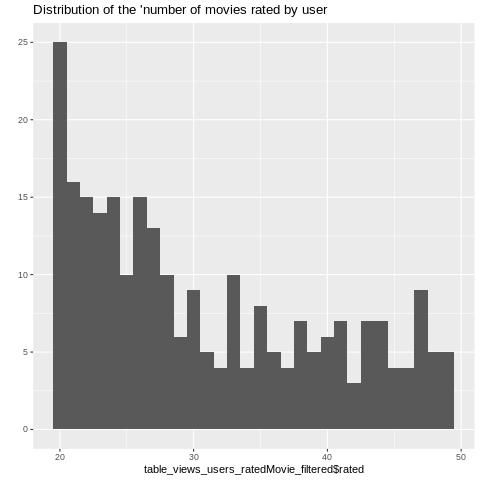

In [220]:
%%R
qplot(table_views_users_ratedMovie_filtered$rated) + stat_bin(binwidth=1) + ggtitle("Distribution of the 'number of movies rated by user")

In [221]:
%%R
views_per_movie=colCounts(data_new)
table_views_movie=data.frame(movie=names(views_per_movie),views=views_per_movie)
table_views_movie=table_views_movie[order(table_views_movie$views,decreasing=TRUE),]
head(table_views_movie)

    movie views
50     50   583
258   258   509
100   100   508
181   181   507
294   294   485
286   286   481


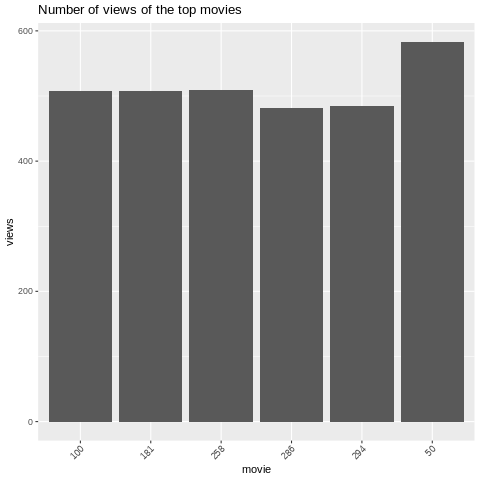

In [222]:
%%R
ggplot(table_views_movie[1:6,],aes(x=movie,y=views)) +
geom_bar(stat="identity") + theme(axis.text.x=element_text(angle=45,hjust=1)) +
ggtitle("Number of views of the top movies")

<font color="blue"> Movie ID '50' is viewed by more number of users (583) followed by movie ids '258','100','181','294','286' </font>






R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



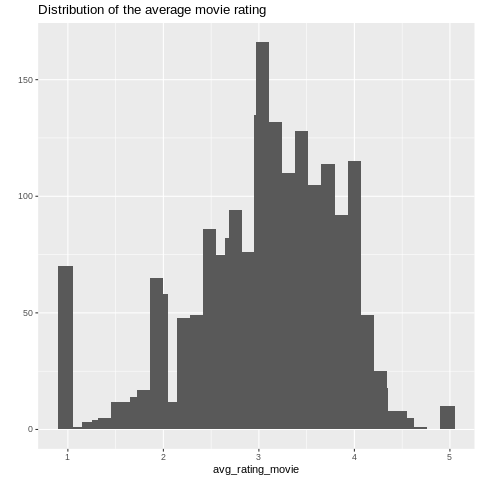

In [162]:
%%R
avg_rating_movie=colMeans(data_new)
qplot(avg_rating_movie) + stat_bin(binwidth=0.1) + ggtitle("Distribution of the average movie rating")

<font color="blue">
Based on movie avearge rating, Highest value/Rating around 3 for many movies. Very few movies are rated around 5 and 1
</font>

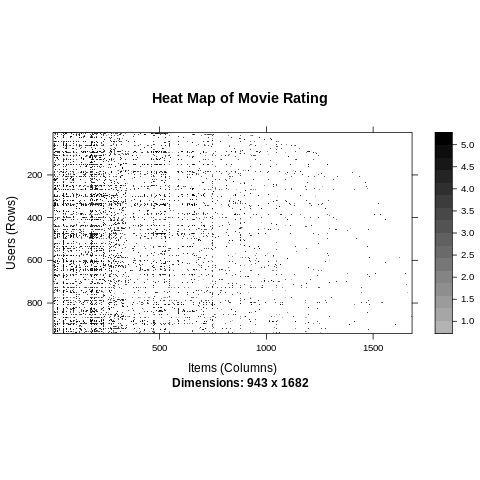

In [163]:
%%R
image(data_new,main="Heat Map of Movie Rating")

<font color="blue"> White spaces in above map denotes movies which are not rated by users (which is approximatly 93% of total ratings(1586126)
</font>

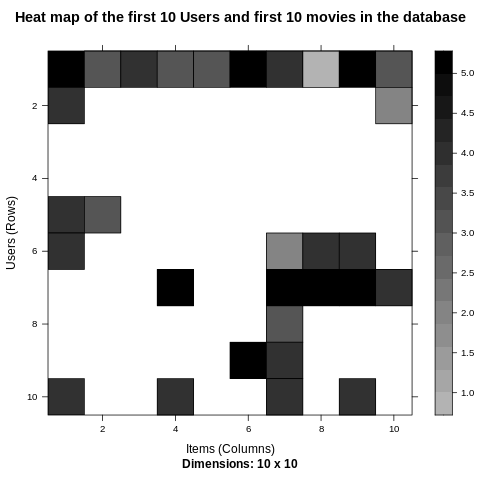

In [164]:
%%R
image(data_new[1:10,1:10], main="Heat map of the first 10 Users and first 10 movies in the database")

In [165]:
%%R
min_n_movies=quantile(rowCounts(data_new),0.99)
min_n_users=quantile(colCounts(data_new),0.99)

In [166]:
%%R
min_n_movies

   99% 
442.54 


In [167]:
%%R
min_n_users

   99% 
369.09 


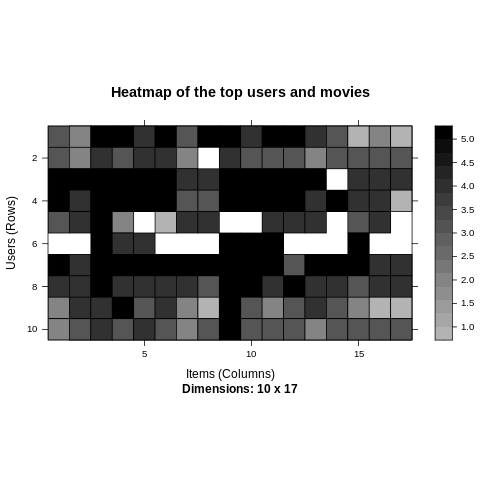

In [168]:
%%R
image(data_new[rowCounts(data_new)>min_n_movies, colCounts(data_new)>min_n_users], main="Heatmap of the top users and movies")

<p><font color="blue">
1. Most of the users have seen top movies
</font>
</p>
<p><font color="blue">
2. Darker columns  represent 'highest' rated movies

</font>
</p>

# Model 1: Random

In [169]:
%%R

# Create model object on our training set
model_random = Recommender(train, method="RANDOM")
print('Model creation successful!')

[1] "Model creation successful!"


In [170]:
%%R

# Evaluate RMSE on test set
predicted_random = predict(model_random, test_X, type="ratings")
predicted_random

283 x 1682 rating matrix of class ‘realRatingMatrix’ with 448512 ratings.


In [171]:
%%R
error_random = calcPredictionAccuracy(predicted_random, test_Y)
error_random

    RMSE      MSE      MAE 
1.347181 1.814898 1.035571 


<font color="blue">
RMSE is very high  for many users. For very few users, Random Prediction model predicted the rating correctly.
</font>

# Model 2: User-Based Collaborative Filtering

In [172]:
%%R

# Create model object on our training set
model_user = Recommender(train, method="UBCF")
print('Model creation successful!')

[1] "Model creation successful!"


In [173]:
%%R

# Evaluate RMSE on test set
predicted_user = predict(model_user, test_X, type="ratings")
predicted_user

283 x 1682 rating matrix of class ‘realRatingMatrix’ with 121328 ratings.


In [174]:
%%R
error_user = calcPredictionAccuracy(predicted_user, test_Y)
error_user

    RMSE      MSE      MAE 
1.265663 1.601902 1.024687 


<font color="blue">
RMSE is better than   Random Prediction model
</font>

# Model 3: Item-Based Collaborative Filtering

In [175]:
%%R

# Create model object on our training set
# Note that this may take a while to train
model_item = Recommender(train, method="IBCF")
print('Model creation successful!')

[1] "Model creation successful!"


In [176]:
%%R

# Evaluate RMSE on test set
predicted_item = predict(model_item, test_X, type="ratings")
predicted_item

283 x 1682 rating matrix of class ‘realRatingMatrix’ with 76857 ratings.


In [177]:
%%R
error_item = calcPredictionAccuracy(predicted_item, test_Y)
error_item

    RMSE      MSE      MAE 
1.587713 2.520833 1.208333 


<font color="blue">
RMSE is better than   Random & UBCF Prediction models. But it predicts very less number of ratings
</font>

<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

<p> <font color="blue">
Collaborative Filtering:
Past user behaviour are analysed in order to establish connections between users and items to recommend an item to a user, based on opinions of other users. 
</font>
</p>
<p>
<font color="blue">
Scenario: New User
</font>
</p>

<p>
<font color="blue">
1. If new user hasn't seen any movie yet, neither IBCF and UBCF is able to recommend item/movie
</font>
</p>

> <p><font color="blue">
     a) IBCF recommendation should work at least one item should be purchased by the user to recommend few more items to that user
</font>
</p>




> <p>
<font color="blue"> 
b) UBCF try to find users whose preferences are similar to given user. As there is no historical data for new user, UBCF won't be helpful for new user </font>
</p>

<p>
<font color="blue">



Scenario: New Items
</font>
</p>

<p>
<font color="blue">
2. As new item hasn't been purchased by anyone, it will never be recommended by anyone in either IBCF/UBCF
</font>
</p>

> <p>
<font color="blue"> 
a) IBCF matches items that have been purchased by the some users, so new item won't be recommended for anyone
</font>
</p>

> <p>
<font color="blue"> 
b) UBCF recommends to each user items purchased by similar users and no one purchased new item, hence algorithm won't recommend it to anyone

</font>
</p>




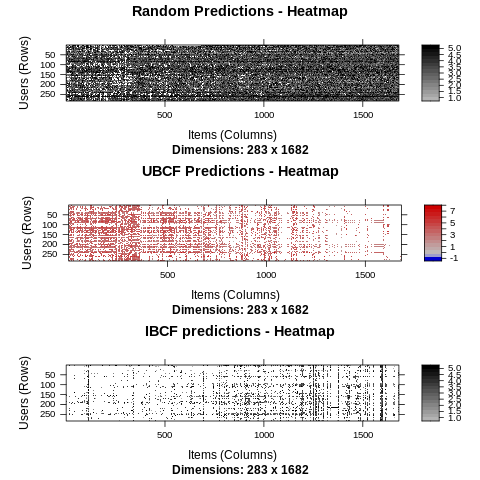

In [178]:
%%R
plot1=image(predicted_random, main="Random Predictions - Heatmap")
plot2=image(predicted_user, main="UBCF Predictions - Heatmap")
plot3 =image(predicted_item, main="IBCF predictions - Heatmap")
grid.arrange(plot1, plot2,plot3, ncol=1)

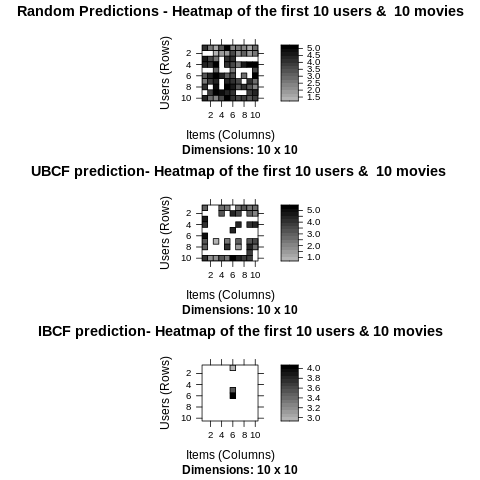

In [179]:
%%R
plot1=image(predicted_random[1:10,1:10], main="Random Predictions - Heatmap of the first 10 users &  10 movies")
plot2= image(predicted_user[1:10,1:10], main="UBCF prediction- Heatmap of the first 10 users &  10 movies ")
plot3=image(predicted_item[1:10,1:10], main="IBCF prediction- Heatmap of the first 10 users & 10 movies")
grid.arrange(plot1, plot2,plot3, ncol=1)

<p><font color="blue">
1. In Random prediction model, number of ratings predicted more than IBCF & UBCF 
model. However RMSE is high compared to UBCF & IBCF, due to highest number of missing ratings in matrix (~90%)
</font>
</p>
<p>
<font color="blue">
2. In  UBCF model, number of ratings predicted more than IBCF  but less than Random model.  However RMSE is high compared to  IBCF but less than Random model.
</font>
</p>
<p>
<font color="blue">
3. In  IBCF model, number of ratings predicted less than IBCF  &  Random model.  however accuracy of prediction is high (as RMSE is low) compare to UBCF & random model
</font>
</p>

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



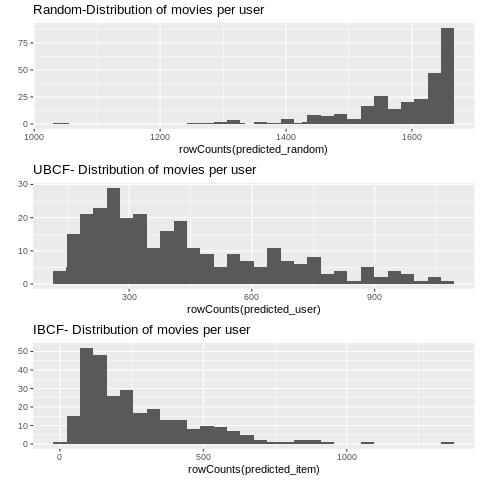

In [180]:
%%R
plot1=qplot(rowCounts(predicted_random)) +geom_histogram(binwidth=10) + ggtitle("Random-Distribution of movies per user")
plot2=qplot(rowCounts(predicted_user)) +geom_histogram(binwidth=10) + ggtitle("UBCF- Distribution of movies per user")
plot3=qplot(rowCounts(predicted_item)) +geom_histogram(binwidth=10) + ggtitle("IBCF- Distribution of movies per user")
grid.arrange(plot1, plot2,plot3, ncol=1)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



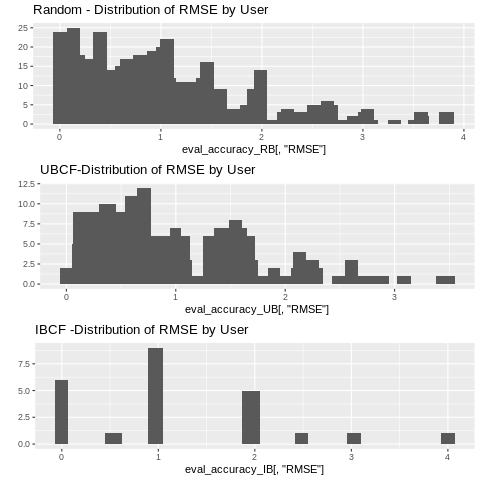

In [181]:
%%R
eval_accuracy_RB=calcPredictionAccuracy(predicted_random, test_Y,byUser=TRUE)
eval_accuracy_UB=calcPredictionAccuracy(predicted_user, test_Y,byUser=TRUE)
eval_accuracy_IB=calcPredictionAccuracy(predicted_item, test_Y,byUser=TRUE)
plot1 = qplot(eval_accuracy_RB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("Random - Distribution of RMSE by User")
plot2=qplot(eval_accuracy_UB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("UBCF-Distribution of RMSE by User")
plot3=qplot(eval_accuracy_IB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("IBCF -Distribution of RMSE by User")
grid.arrange(plot1, plot2,plot3, ncol=1)

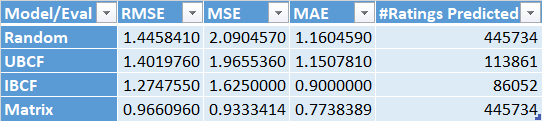

<p><font color=blue>

1. Random Model- Number of ratings predicted is high in Random Model though RMSE is high. This model predicted the 445734 ratings
</font>
</p>
</p>
<font color=blue>


2. UBCF - Number of ratings predicted is less compare to Random model, however RMSE is improved. This model predicted 113861 ratings
</font>
</p>
<p><font color=blue>
3. IBCF - Number of  ratings predicted  is less compare to Random & UBCF  models, however RMSE is improved. This model predicted 86052 ratings. this is lowest count among all models

</font>
</p>


<p><font color=blue>
<p><font color= blue>
In the train dataset out of 660 users, 257 users rated less than 50 movies; Out of 1682 movies, 843 movies (~50%) are rated by less than 20 users.
This leads better RMSE in IBCF model but poor number of ratings predicted by it
</font>
</p>





# Model 4: Matrix Factorization

In [182]:
%%R

# Create model object on our training set
model_matrix = Recommender(train, method="SVD")
print('Model creation successful!')

[1] "Model creation successful!"


In [183]:
%%R

# Evaluate RMSE on test set
predicted_matrix = predict(model_matrix, test_X, type="ratings")
predicted_matrix

283 x 1682 rating matrix of class ‘realRatingMatrix’ with 448512 ratings.


In [184]:
%%R
error_matrix = calcPredictionAccuracy(predicted_matrix, test_Y)
error_matrix

     RMSE       MSE       MAE 
1.0586831 1.1208099 0.8677511 


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

No code is required for this question.

*Type your response here...*

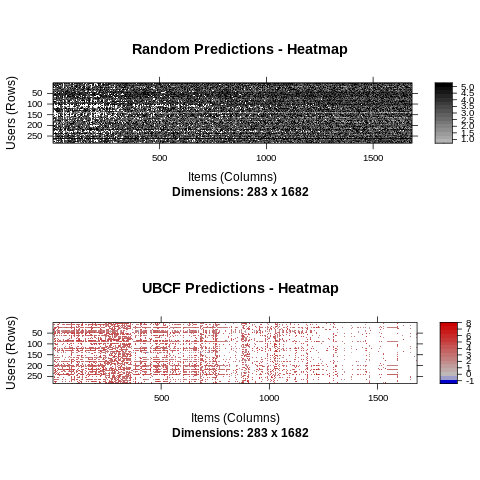

In [185]:
%%R
plot1=image(predicted_random, main="Random Predictions - Heatmap")
plot2=image(predicted_user, main="UBCF Predictions - Heatmap")
grid.arrange(plot1, plot2,nrow=2)

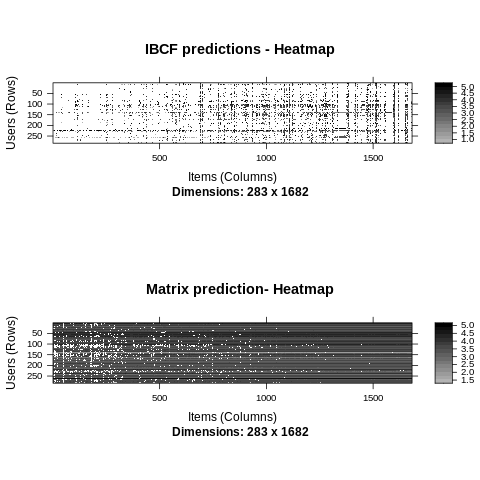

In [186]:
%%R
plot3 =image(predicted_item, main="IBCF predictions - Heatmap")
plot4=image(predicted_matrix, main="Matrix prediction- Heatmap")
grid.arrange(plot3, plot4,nrow=2)

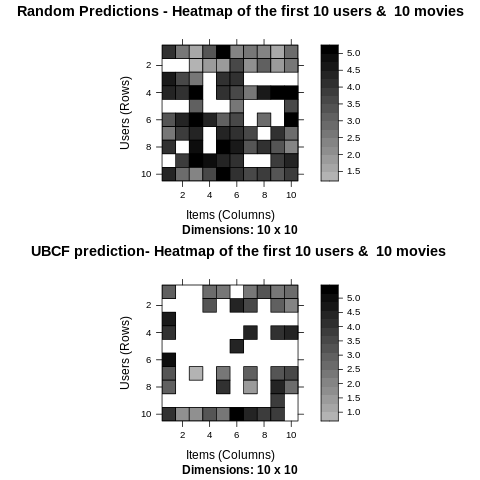

In [187]:
%%R
plot1=image(predicted_random[1:10,1:10], main="Random Predictions - Heatmap of the first 10 users &  10 movies")
plot2= image(predicted_user[1:10,1:10], main="UBCF prediction- Heatmap of the first 10 users &  10 movies ")
grid.arrange(plot1, plot2,nrow=2)

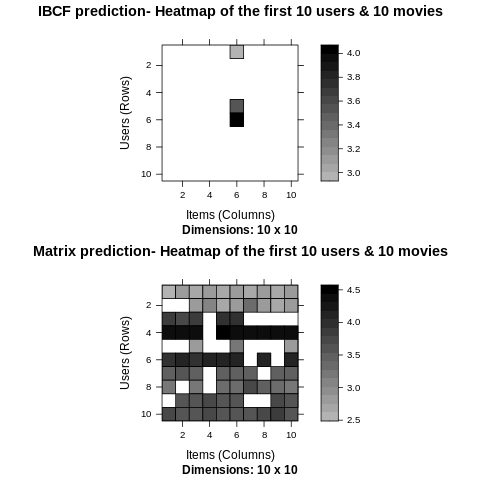

In [188]:
%%R
plot3=image(predicted_item[1:10,1:10], main="IBCF prediction- Heatmap of the first 10 users & 10 movies")
plot4=image(predicted_matrix[1:10,1:10], main="Matrix prediction- Heatmap of the first 10 users & 10 movies")
grid.arrange(plot3, plot4,nrow=2)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



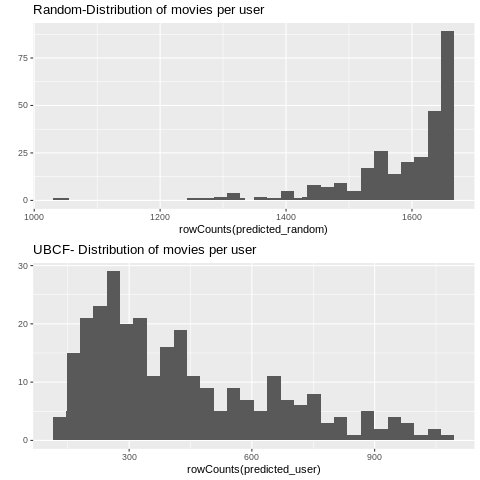

In [189]:
%%R
plot1=qplot(rowCounts(predicted_random)) +geom_histogram(binwidth=10) + ggtitle("Random-Distribution of movies per user")
plot2=qplot(rowCounts(predicted_user)) +geom_histogram(binwidth=10) + ggtitle("UBCF- Distribution of movies per user")
grid.arrange(plot1, plot2, ncol=1)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



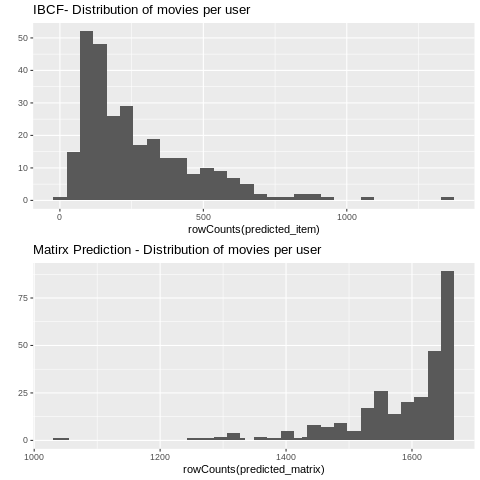

In [190]:
%%R

plot3=qplot(rowCounts(predicted_item)) +geom_histogram(binwidth=10) + ggtitle("IBCF- Distribution of movies per user")
plot4=qplot(rowCounts(predicted_matrix)) +geom_histogram(binwidth=10) + ggtitle("Matirx Prediction - Distribution of movies per user")
grid.arrange(plot3,plot4, ncol=1)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



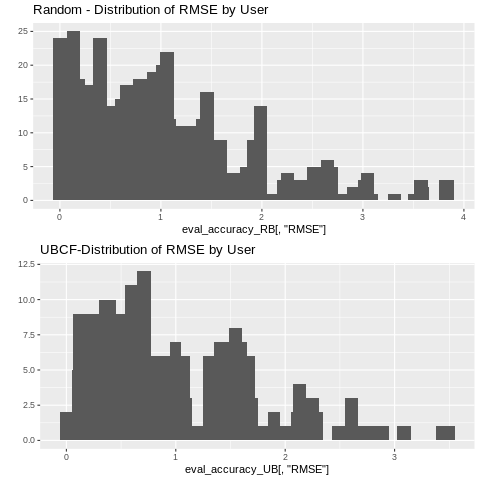

In [191]:
%%R
eval_accuracy_RB=calcPredictionAccuracy(predicted_random, test_Y,byUser=TRUE)
eval_accuracy_UB=calcPredictionAccuracy(predicted_user, test_Y,byUser=TRUE)
plot1 = qplot(eval_accuracy_RB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("Random - Distribution of RMSE by User")
plot2=qplot(eval_accuracy_UB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("UBCF-Distribution of RMSE by User")
grid.arrange(plot1, plot2, ncol=1)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



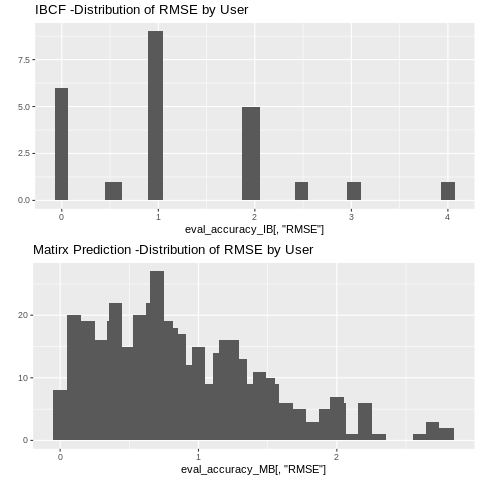

In [192]:
%%R
eval_accuracy_IB=calcPredictionAccuracy(predicted_item, test_Y,byUser=TRUE)
eval_accuracy_MB=calcPredictionAccuracy(predicted_matrix, test_Y,byUser=TRUE)
plot3=qplot(eval_accuracy_IB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("IBCF -Distribution of RMSE by User")
plot4=qplot(eval_accuracy_MB[,"RMSE"])+ geom_histogram(binwidth=0.1) + ggtitle("Matirx Prediction -Distribution of RMSE by User")
grid.arrange(plot3,plot4, ncol=1)

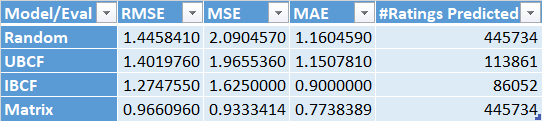

<p>
<font color="blue">
Compare to other 3 models, matrix prediction model given best results, as number of ratings predicted is high with less RMSE value
</font>
</p>

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. The `recommenderlab` library makes this super easy!

Note that some of these values may take some time (a few minutes) to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

*Type your response here...*

In [193]:
%%R
results_random = evaluate(data_split, method="RANDOM", type="topNList", n=seq(5,50,5))
results_random@results


RANDOM run fold/sample [model time/prediction time]
	 1  [0.002sec/0.317sec] 
[[1]]
An object of class "confusionMatrix"
Slot "cm":
           TP        FP        FN       TN   precision     recall        TPR
5  0.01060071  4.989399 0.8303887 1677.170 0.002120141 0.01260504 0.01260504
10 0.02120141  9.978799 0.8197880 1672.180 0.002120141 0.02521008 0.02521008
15 0.03533569 14.964664 0.8056537 1667.194 0.002355713 0.04201681 0.04201681
20 0.04240283 19.957597 0.7985866 1662.201 0.002120141 0.05042017 0.05042017
25 0.06007067 24.939929 0.7809187 1657.219 0.002402827 0.07142857 0.07142857
30 0.06360424 29.936396 0.7773852 1652.223 0.002120141 0.07563025 0.07563025
35 0.07420495 34.925795 0.7667845 1647.233 0.002120141 0.08823529 0.08823529
40 0.08480565 39.915194 0.7561837 1642.244 0.002120141 0.10084034 0.10084034
45 0.08480565 44.915194 0.7561837 1637.244 0.001884570 0.10084034 0.10084034
50 0.09187279 49.908127 0.7491166 1632.251 0.001837456 0.10924370 0.10924370
           FPR
5  0.0

In [194]:
%%R

results_user = evaluate(data_split, method="UBCF", type="topNList", , n=seq(5,50,5))
results_user@results


UBCF run fold/sample [model time/prediction time]
	 1  [0.028sec/1.796sec] 
[[1]]
An object of class "confusionMatrix"
Slot "cm":
            TP        FP        FN       TN    precision      recall
5  0.007067138  4.992933 0.8339223 1677.166 0.0014134276 0.008403361
10 0.014134276  9.985866 0.8268551 1672.173 0.0014134276 0.016806723
15 0.021201413 14.978799 0.8197880 1667.180 0.0014134276 0.025210084
20 0.028268551 19.971731 0.8127208 1662.187 0.0014134276 0.033613445
25 0.031802120 24.968198 0.8091873 1657.191 0.0012720848 0.037815126
30 0.038869258 29.961131 0.8021201 1652.198 0.0012956419 0.046218487
35 0.042402827 34.957597 0.7985866 1647.201 0.0012115093 0.050420168
40 0.045936396 39.954064 0.7950530 1642.205 0.0011484099 0.054621849
45 0.045936396 44.954064 0.7950530 1637.205 0.0010208088 0.054621849
50 0.049469965 49.950530 0.7915194 1632.208 0.0009893993 0.058823529
           TPR         FPR
5  0.008403361 0.002968169
10 0.016806723 0.005936338
15 0.025210084 0.008904507
20 

In [195]:
%%R

results_item = evaluate(data_split, method="IBCF", type="topNList", n=seq(5, 50,5))
results_item@results

IBCF run fold/sample [model time/prediction time]
	 1  [3.347sec/0.121sec] 
[[1]]
An object of class "confusionMatrix"
Slot "cm":
            TP        FP        FN       TN    precision      recall
5  0.003533569  4.996466 0.8374558 1677.163 0.0007067138 0.004201681
10 0.007067138  9.992933 0.8339223 1672.166 0.0007067138 0.008403361
15 0.014134276 14.985866 0.8268551 1667.173 0.0009422850 0.016806723
20 0.014134276 19.985866 0.8268551 1662.173 0.0007067138 0.016806723
25 0.014134276 24.975265 0.8268551 1657.184 0.0005653710 0.016806723
30 0.014134276 29.957597 0.8268551 1652.201 0.0004711425 0.016806723
35 0.014134276 34.939929 0.8268551 1647.219 0.0004038364 0.016806723
40 0.017667845 39.908127 0.8233216 1642.251 0.0004416961 0.021008403
45 0.017667845 44.855124 0.8233216 1637.304 0.0003926188 0.021008403
50 0.017667845 49.791519 0.8233216 1632.367 0.0003533569 0.021008403
           TPR         FPR
5  0.004201681 0.002970270
10 0.008403361 0.005940540
15 0.016806723 0.008908709
20 

In [196]:
%%R

results_matrix = evaluate(data_split, method="SVD", type="topNList", n=seq(5, 50,5))
results_matrix@results

SVD run fold/sample [model time/prediction time]
	 1  [0.227sec/0.389sec] 
[[1]]
An object of class "confusionMatrix"
Slot "cm":
           TP        FP        FN       TN   precision     recall        TPR
5  0.06360424  4.936396 0.7773852 1677.223 0.012720848 0.07563025 0.07563025
10 0.11660777  9.883392 0.7243816 1672.276 0.011660777 0.13865546 0.13865546
15 0.13427562 14.865724 0.7067138 1667.293 0.008951708 0.15966387 0.15966387
20 0.15901060 19.840989 0.6819788 1662.318 0.007950530 0.18907563 0.18907563
25 0.17667845 24.823322 0.6643110 1657.336 0.007067138 0.21008403 0.21008403
30 0.18727915 29.812721 0.6537102 1652.346 0.006242638 0.22268908 0.22268908
35 0.19787986 34.802120 0.6431095 1647.357 0.005653710 0.23529412 0.23529412
40 0.21908127 39.780919 0.6219081 1642.378 0.005477032 0.26050420 0.26050420
45 0.23321555 44.766784 0.6077739 1637.392 0.005182568 0.27731092 0.27731092
50 0.24381625 49.756184 0.5971731 1632.403 0.004876325 0.28991597 0.28991597
           FPR
5  0.0029

In [197]:
%%R
models_to_evaluate=list(IBCF_cos=list(name="IBCF",param=list(method="cosine")),
                        IBCF_cor=list(name="IBCF",param=list(method="pearson")),
                        UBCF_cos=list(name="UBCF",param=list(method="cosine")),
                        UBCF_cor=list(name="UBCF",param=list(method="pearson")),
                        Random_cos=list(name="RANDOM",param=list(method="cosine")),
                        SVD_cos=list(name="SVD",param=list(method="cosine"))
                        

                        )

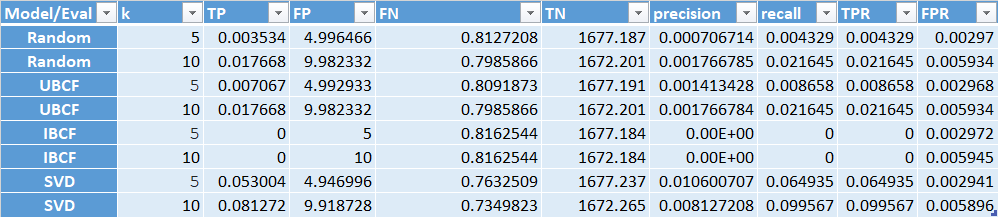

<p>
<font color=blue>
1. There is improvement in UBCF, IBCF, SVD when k value increases
</font>
</p>
<p>
<font color=blue>
2. There is not much improvement in TN, FPR irrespective models
<p>
</font>
</p>
<font color=blue>
3. IBCF shows poor performance with respect to TP 
</font>
</p>
<p>
<font color=blue>
4. However TP shows significant improvement in SVD/matrix model


</font>
</p>

In [198]:
%%R
n_recommendations=seq(5,50,5)

In [199]:
%%R
list_results=evaluate(x=data_split,method=models_to_evaluate,n=n_recommendations)

IBCF run fold/sample [model time/prediction time]
	 1  [3.437sec/0.341sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [2.926sec/0.147sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.01sec/1.568sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.012sec/1.9sec] 
RANDOM run fold/sample [model time/prediction time]
	 1  [0.002sec/0.31sec] 
SVD run fold/sample [model time/prediction time]
	 1  

R[write to console]: Warning:
R[write to console]:  Unknown parameter: method



Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
verbose	 =  FALSE
[0.19sec/0.44sec] 


In [200]:
%%R
class(list_results)

[1] "evaluationResultList"
attr(,"package")
[1] "recommenderlab"


In [201]:
%%R
sapply(list_results,class)=="evaluationResults"

  IBCF_cos   IBCF_cor   UBCF_cos   UBCF_cor Random_cos    SVD_cos 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 


In [202]:
%%R
avg_matrics=lapply(list_results,avg)

In [203]:
%%R
head(avg_matrics$IBCF_cos[,5:8])

      precision      recall         TPR         FPR
5  0.0007067138 0.004201681 0.004201681 0.002970270
10 0.0007067138 0.008403361 0.008403361 0.005940540
15 0.0009422850 0.016806723 0.016806723 0.008908709
20 0.0007067138 0.016806723 0.016806723 0.011881080
25 0.0005653710 0.016806723 0.016806723 0.014847148
30 0.0004711425 0.016806723 0.016806723 0.017809015


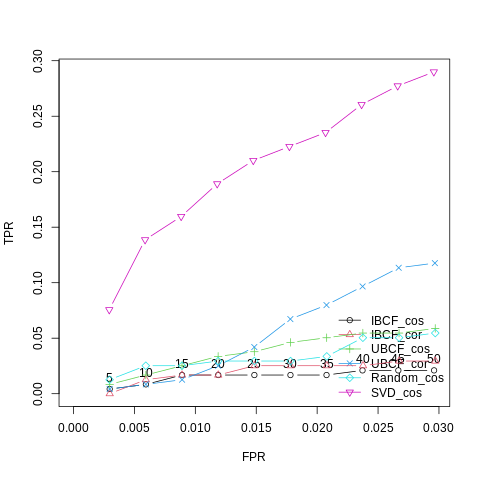

In [204]:
%%R
plot(list_results,annotate=TRUE,main="ROC Curve")

<p>
<font color=blue>
Good performance index is  the Area Under the Curve (AUC), that is area under the ROC curve . Area under the ROC curve is high for SVD model compare to others
</font>
</p>

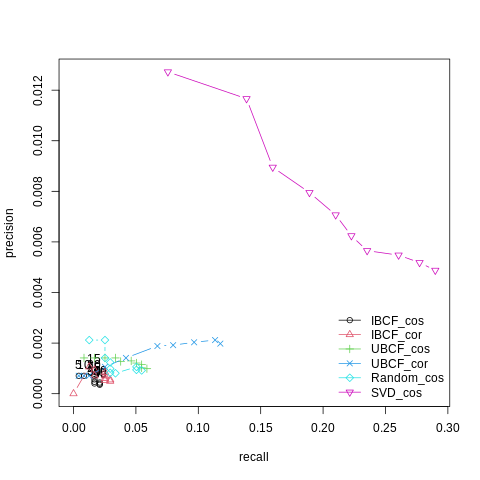

In [205]:
%%R
plot(list_results,"prec/rec",annotate=TRUE,main="Precision-recall")

<p>
<font color=blue>
as per above diagram, still SVD model gives better result compare to others
</font>
</p>

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

<p>
<font color=blue>
For User_Id=5, every model returns different set of top rated movies. In real world instead of using rating predicted using one method, we would use the  average of  predictes rating  from  multiple method to come up with the ratings
</font>
</p>

In [206]:
%%R

# Pick a user and value of n
user_id = 5
n = 10
print('Variable update successful!')

[1] "Variable update successful!"


In [207]:
%%R

# Repeat this process for the all models
for (model in c(model_random, model_user, model_item, model_matrix)) {
    # Get recs for model
    user_recs = predict(model, test_X, n=n, type="ratings")
    
    # Print the top n recs for that user
    print(model)
    print(user_recs@data[user_id,][order(-user_recs@data[user_id,])][c(1:n)])
}

### Note that this prints the model type, followed by 2 rows of numbers.
### The first row is the movie ID.
### The second row is the rating that the given sample user (5) would assign to that
### movie, based on our prediction!
### We show the top n=10 predictions for each model, with "top" meaning the top
### predicted movie ratings.

print('Top N predictions successful!')

Recommender of type ‘RANDOM’ for ‘realRatingMatrix’ 
learned using 660 users.
104 107 136 220 246 250 284 330 335 352 
  5   5   5   5   5   5   5   5   5   5 
Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 660 users.
     133     1005      253     1008     1010     1084        6     1129 
5.044174 4.582293 4.552822 4.552822 4.552822 4.552822 4.533513 4.533513 
    1154      744 
4.533513 4.476511 
Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 660 users.
120 169 189 277 278 284 375 381 386 434 
  5   5   5   5   5   5   5   5   5   5 
Recommender of type ‘SVD’ for ‘realRatingMatrix’ 
learned using 660 users.
     496      192      133      134      245      151      528      169 
4.028640 3.631745 3.613939 3.569774 3.545305 3.500639 3.474251 3.471017 
     660      408 
3.462316 3.456158 
[1] "Top N predictions successful!"


Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.xpro.mit.edu/asset-v1:xPRO+DSx+R14+type@asset+block/4.1_instruction_manual_14.html) to wrap up this case study properly.